# Image_Geometry_Processing

## 크기 변경

In [ ]:
import numpy as np, cv2, time

def scaling(img, size):  # 크기 변경 함수
    dst = np.zeros(size[::-1], img.dtype)  # 행렬과 크기는 원소가 역순
    ratioY, ratioX = np.divide(size[::-1], img.shape[:2])
    y = np.arange(0, img.shape[0], 1)
    x = np.arange(0, img.shape[1], 1)
    y, x = np.meshgrid(y, x)
    i, j = np.int32(y * ratioY), np.int32(x * ratioX)
    dst[i, j] = img[y, x]
    return dst

def scaling2(img, size):  # 크기 변경 함수
    dst = np.zeros(size[::-1], img.dtype)  # 행렬과 크기는 원소가 역순
    ratioY, ratioX = np.divide(size[::-1], img.shape[:2])
    for y in range(img.shape[0]):  # 입력 영상 순회 - 순방향 사상
        for x in range(img.shape[1]):
            i, j = int(y * ratioY), int(x * ratioX)  # 목적 영상의 y, x 좌표
            dst[i, j] = img[y, x]
    return dst

def time_check(func, image, size, title):  ## 수행시간 체크 함수
    start_time = time.perf_counter()
    ret_img = func(image, size)
    elapsed = (time.perf_counter() - start_time) * 1000
    print(title, " 수행시간 = %0.2f ms" % elapsed)
    return ret_img

image = cv2.imread('./data/scaling.jpg', cv2.IMREAD_GRAYSCALE)
if image is None: raise Exception("영상 파일을 읽기 에러")

dst1 = scaling(image, (150, 200))  # 크기 변경 - 축소
dst2 = scaling2(image, (150, 200))  # 크기 변경 - 축소
dst3 = time_check(scaling, image, (300, 400), "[방법1] 정방행렬 방식>")
dst4 = time_check(scaling2, image, (300, 400), "[방법2] 반복문 방식>")

cv2.imshow("image", image)
cv2.imshow("dst1- zoom out", dst1)
cv2.imshow("dst3- zoom out", dst3)
cv2.resizeWindow("dst1- zoom out", 260, 200)  # 윈도우 크기 확장
cv2.waitKey(0)


## 보간

### 최근접 이웃 보간

In [ ]:
import numpy as np, cv2
# 크기 변경 함수
def scaling(img, size):                                # 크기 변경 함수
    dst = np.zeros(size[::-1], img.dtype)               # 행렬과 크기는 원소가 역순
    ratioY, ratioX = np.divide(size[::-1], img.shape[:2])
    i = np.arange(0, img.shape[0], 1)
    j = np.arange(0, img.shape[1], 1)
    i, j = np.meshgrid(i, j)
    y, x = np.int32(i * ratioY), np.int32(j * ratioX)
    dst[y,x] = img[i,j]
    return dst

def scaling_nearest(img, size):                                # 크기 변경 함수
    dst = np.zeros(size[::-1], img.dtype)               # 행렬과 크기는 원소가 역순
    ratioY, ratioX = np.divide(size[::-1], img.shape[:2])
    i = np.arange(0, size[1], 1)
    j = np.arange(0, size[0], 1)
    i, j = np.meshgrid(i, j)
    y, x = np.int32(i / ratioY), np.int32(j / ratioX)
    dst[i,j] = img[y,x]

    return dst

image = cv2.imread('./data/interpolation.jpg', cv2.IMREAD_GRAYSCALE)
if image is None: raise Exception("영상 파일을 읽기 에러")

dst1 = scaling(image, (350, 400))                   # 크기 변경 - 기본
dst2 = scaling_nearest(image, (350, 400))           # 크기 변경 - 최근접 이웃 보간

cv2.imshow("image", image)
cv2.imshow("dst1- forward mapping", dst1)          # 순방향 사상
cv2.imshow("dst2- NN interpolation", dst2)         # Nearest Neighbor interpolation
cv2.waitKey(0)

### 양선형 보간

In [ ]:
import cv2

image = cv2.imread('./data/interpolation.jpg', cv2.IMREAD_GRAYSCALE)
if image is None: raise Exception("영상 파일 읽기 에러")

size = (350, 400)
dst1 = cv2.resize(image, size, 0, 0, cv2.INTER_LINEAR)  # OpenCV 함수 적용
dst2 = cv2.resize(image, size, 0, 0, cv2.INTER_NEAREST)

cv2.imshow("image", image)
cv2.imshow("OpenCV_bilinear", dst1)
cv2.imshow("OpenCV_Nearest", dst2)
cv2.waitKey(0)

## 평행 이동

In [ ]:
import numpy as np, cv2

def contain(p, shape):                              # 좌표(y,x)가 범위내 인지 검사
    return 0<= p[0] < shape[0] and 0<= p[1] < shape[1]

def translate(img, pt):
    dst = np.zeros(img.shape, img.dtype)            # 목적 영상 생성
    for i in range(img.shape[0]):                           # 목적 영상 순회 - 역방향 사상
        for j in range(img.shape[1]):
            x, y = np.subtract((j, i) , pt)
            if contain((y, x), img.shape):
                dst[i, j] = img[y, x]
    return dst

image = cv2.imread('./data/translate.jpg', cv2.IMREAD_GRAYSCALE)
if image is None: raise Exception("영상 파일을 읽기 에러")

dst1 = translate(image, (30, 80))                  # x = 30, y = 80 으로 평행이동
dst2 = translate(image, (-70, -50))

cv2.imshow("image", image)
cv2.imshow("dst1: trans to (80, 30)", dst1);
cv2.imshow("dst2: trans to (-50, -70)", dst2);
cv2.waitKey(0)


## 회전

In [ ]:
import numpy as np,  cv2
def bilinear_value(img, pt):
    x, y = np.int32(pt)
    if y >= img.shape[0]-1: y = y - 1
    if x >= img.shape[1]-1: x = x - 1

    P1, P2, P3, P4 = np.float32(img[y:y+2,x:x+2].flatten())
    alpha, beta = pt[1] - y,  pt[0] - x                   # 거리 비율

    M1 = P1 + alpha * (P3 - P1)                      # 1차 보간
    M2 = P2 + alpha * (P4 - P2)
    P  = M1 + beta  * (M2 - M1)                     # 2차 보간
    return np.clip(P, 0, 255)                       # 화소값 saturation후 반환

def contain(p, shape):                              # 좌표(y,x)가 범위내 인지 검사
    return 0<= p[0] < shape[0] and 0<= p[1] < shape[1]

def rotate(img, degree):
    dst = np.zeros(img.shape[:2], img.dtype)                     # 목적 영상 생성
    radian = (degree/180) * np.pi                               # 회전 각도 - 라디언
    sin, cos = np.sin(radian), np.cos(radian)   # 사인, 코사인 값 미리 계산

    for i in range(img.shape[0]):                                       # 목적 영상 순회 - 역방향 사상
        for j in range(img.shape[1]):
            y = -j * sin + i * cos
            x =  j * cos + i * sin                  # 회선 변환 수식
            if contain((y, x), img.shape):             # 입력 영상의 범위 확인
                dst[i, j] = bilinear_value(img, [x, y])           # 화소값 양선형 보간
    return dst

def rotate_pt(img, degree, pt):
    dst = np.zeros(img.shape[:2], img.dtype)                     # 목적 영상 생성
    radian = (degree/180) * np.pi                               # 회전 각도 - 라디언
    sin, cos = np.sin(radian), np.cos(radian)   # 사인, 코사인 값 미리 계산

    for i in range(img.shape[0]):                              # 목적 영상 순회 - 역방향 사상
        for j in range(img.shape[1]):
            jj, ii = np.subtract((j, i), pt)                # 중심좌표 평행이동,
            y = -jj * sin + ii * cos               # 회선 변환 수식
            x =  jj * cos + ii * sin
            x, y = np.add((x, y), pt)
            if contain((y, x), img.shape):                      # 입력 영상의 범위 확인
                dst[i, j] = bilinear_value(img, [x, y])           # 화소값 양선형 보간
    return dst

image = cv2.imread('./data/rotate.jpg', cv2.IMREAD_GRAYSCALE)
if image is None: raise Exception("영상 파일을 읽기 에러")

center = np.divmod(image.shape[::-1], 2)[0]
dst1 = rotate(image, 20)                                        # 원점 기준 회전 변환
dst2 = rotate_pt(image, 20, center )                             # 영상 중심 기준 회전 변환

cv2.imshow("image", image)
cv2.imshow("dst1-rotated on org", dst1)
cv2.imshow("dst2-rotated on center", dst2)
cv2.waitKey(0)

## AffineTransform

In [ ]:
import numpy as np, cv2

image = cv2.imread('./data/affine.jpg', cv2.IMREAD_GRAYSCALE)
if image is None: raise Exception("영상 파일을 읽기 에러")

center = (200, 200)                                 # 회전 변환 기준 좌표
angle, scale = 30,  1                               # 회전 각도, 크기 지정 - 크기 변경은 안 함
size = image.shape[::-1]                            # 영상크기는 행렬 행태의 역순

pt1 = np.array([( 30, 70),(20, 240), (300, 110)], np.float32)
pt2 = np.array([(120, 20),(10, 180), (280, 260)], np.float32)
aff_mat = cv2.getAffineTransform(pt1, pt2)              # 3개 좌표 쌍으로 어파인 행렬 생성
rot_mat = cv2.getRotationMatrix2D(center, angle, scale) # 회전 변환을 위한 어파인 행렬

dst1 = cv2.warpAffine(image, aff_mat, size, cv2.INTER_LINEAR)
dst2 = cv2.warpAffine(image, rot_mat, size, cv2.INTER_LINEAR)

image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
dst1 = cv2.cvtColor(dst1, cv2.COLOR_GRAY2BGR )

for i in range(len(pt1)):
    cv2.circle(image, tuple(pt1[i].astype(int)), 3, (0, 0, 255), 2)
    cv2.circle(dst1 , tuple(pt2[i].astype(int)), 3, (0, 0, 255), 2)

cv2.imshow("image", image)
cv2.imshow("dst1_affine", dst1)
cv2.imshow("dst2_affine_rotate", dst2)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Image Conversion Area Processing

## 공간 주파수

### 주파수 그리기

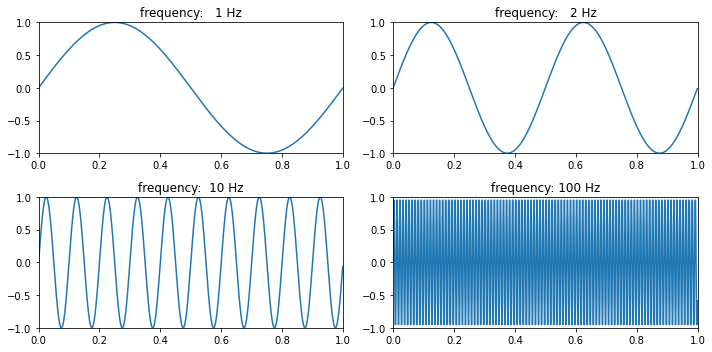

In [1]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0, 1, 0.001)    # Time vector
Hz = [1, 2, 10, 100]
gs = [np.sin(2 * np.pi * t * h) for h in Hz]

plt.figure(figsize=(10,5))
for i, g in enumerate(gs):
    plt.subplot(2, 2, i+1), plt.plot(t, g)
    plt.xlim(0, 1),  plt.ylim(-1, 1 )
    plt.title("frequency: %3d Hz" % Hz[i])
plt.tight_layout()
plt.show()

## 이산 푸리에 변환

### 이산 푸리에 변환

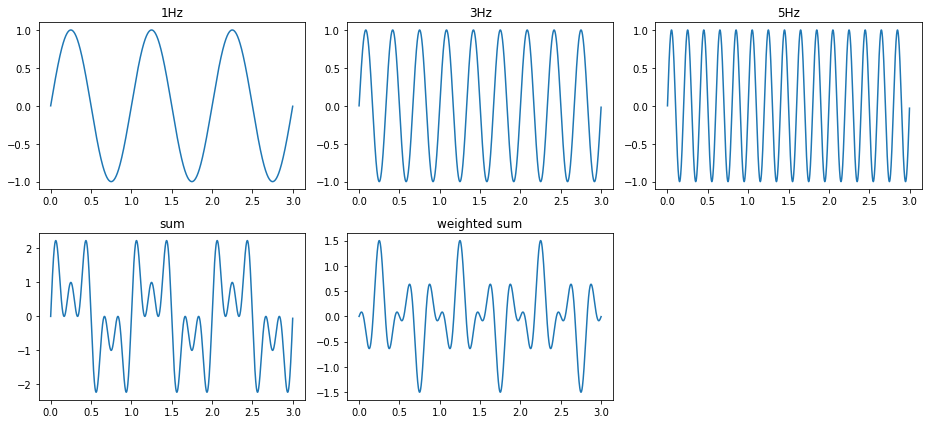

In [2]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0, 3, 0.001)    # Time vector
g = [0] *5
g[0] = np.sin(2 * np.pi * t )
g[1] = np.sin(2 * np.pi * t * 3 )
g[2] = np.sin(2 * np.pi * t * 5 )
g[3] = g[0] + g[1] + g[2]
g[4] = 0.3* g[0] - 0.7 * g[1] + 0.5* g[2]

titles = ['1Hz', '3Hz','5Hz','sum','weighted sum']
plt.figure(figsize=(13,6))
for i, title in enumerate(titles):
    plt.subplot(2, 3, i+1), plt.plot(t, g[i]), plt.title(title)
plt.tight_layout()
plt.show()

### 고속 푸리에 변환

In [ ]:
import numpy as np, cv2, math

image = cv2.imread('./data/dft_240.jpg', cv2.IMREAD_GRAYSCALE)
if image is None: raise Exception("영상파일 읽기 에러")

dft1 = np.fft.fft2(image)                                # 2차원 DFT 수행
dft2 = cv2.dft(np.float32(image), flags = cv2.DFT_COMPLEX_OUTPUT)

idft1 = np.fft.ifft2(dft1).real                          # 2차원 IDFT 수행
idft2 = cv2.idft(dft2, flags=cv2.DFT_SCALE)[:,:,0]

print("np.fft 방법 변환 행렬 크기:", dft1.shape)
print("cv2.dft 방법 변환 행렬 크기:", dft2.shape)

cv2.imshow("image", image)
cv2.imshow("idft_img1", cv2.convertScaleAbs(idft1))
cv2.imshow("idft_img2", cv2.convertScaleAbs(idft2))
cv2.waitKey(0)